In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
predictions = pd.read_csv('data/character-predictions_pose.csv')
predictions = predictions[['name', 'male', 'house', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'culture']]
predictions.dropna(inplace=True)
predictions

,name,male,house,isNoble,age,numDeadRelations,popularity,isAlive,culture
1,Walder Frey,1,House Frey,1,97.0,1,0.896321,1,Rivermen
4,Sylva Santagar,0,House Santagar,1,29.0,0,0.043478,1,Dornish
6,Valarr Targaryen,1,House Targaryen,1,26.0,0,0.431438,0,Valyrian
48,Wex Pyke,1,House Botley,0,19.0,0,0.113712,1,Ironborn
49,Timett,1,Burned Men,1,27.0,0,0.073579,1,Vale mountain clans
...,...,...,...,...,...,...,...,...,...
1917,Sarella Sand,0,House Martell,0,25.0,1,0.103679,1,Dornishmen
1918,Rhaegar Targaryen,1,House Targaryen,1,24.0,11,0.799331,0,Valyrian
1927,Loras Tyrell,1,House Tyrell,1,23.0,2,0.665552,1,The Reach
1935,Gormond Goodbrother,1,House Goodbrother,0,23.0,0,0.040134,1,Ironborn


In [13]:
for house in predictions.house:
    percent_alive = predictions[predictions.house == house].isAlive.mean()
    predictions.loc[predictions.house == house, 'house_alive'] = percent_alive

# Bin house_alive into 5 bins
binned_house_alive = pd.qcut(predictions['house_alive'],10,retbins=True, duplicates = 'drop')
bins = binned_house_alive[1]
predictions['house_alive_binned'] = pd.cut(predictions['house_alive'],bins = bins)
dum = pd.get_dummies(predictions.house_alive_binned,drop_first = True)
dum.columns = ['house_alive'+str(x) for x in range(1,len(bins)-1)]
predictions = pd.concat([predictions,dum], axis = 1)

predictions

,name,male,house,isNoble,age,numDeadRelations,popularity,isAlive,culture,house_alive,house_alive_binned,house_alive1,house_alive2,house_alive3,house_alive4,house_alive5,house_alive6
1,Walder Frey,1,House Frey,1,97.0,1,0.896321,1,Rivermen,0.800000,"(0.75, 0.846]",0,0,0,0,1,0
4,Sylva Santagar,0,House Santagar,1,29.0,0,0.043478,1,Dornish,1.000000,"(0.846, 1.0]",0,0,0,0,0,1
6,Valarr Targaryen,1,House Targaryen,1,26.0,0,0.431438,0,Valyrian,0.151515,"(0.0, 0.152]",0,0,0,0,0,0
48,Wex Pyke,1,House Botley,0,19.0,0,0.113712,1,Ironborn,1.000000,"(0.846, 1.0]",0,0,0,0,0,1
49,Timett,1,Burned Men,1,27.0,0,0.073579,1,Vale mountain clans,1.000000,"(0.846, 1.0]",0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,Sarella Sand,0,House Martell,0,25.0,1,0.103679,1,Dornishmen,0.846154,"(0.75, 0.846]",0,0,0,0,1,0
1918,Rhaegar Targaryen,1,House Targaryen,1,24.0,11,0.799331,0,Valyrian,0.151515,"(0.0, 0.152]",0,0,0,0,0,0
1927,Loras Tyrell,1,House Tyrell,1,23.0,2,0.665552,1,The Reach,1.000000,"(0.846, 1.0]",0,0,0,0,0,1
1935,Gormond Goodbrother,1,House Goodbrother,0,23.0,0,0.040134,1,Ironborn,1.000000,"(0.846, 1.0]",0,0,0,0,0,1


Text(0.5,0,'house_bin')

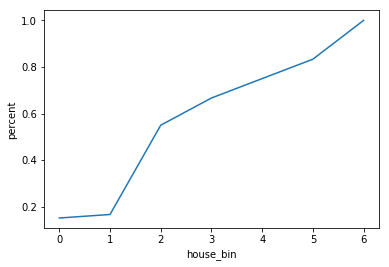

In [14]:
age_data = predictions.groupby('house_alive_binned')['isAlive'].agg([('percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = age_data.index, y= age_data['percent'])
plt.xlabel('house_bin')